In [1]:
import os
import numpy as np
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import textwrap

In [2]:
def get_latent_theta(adata: ad.AnnData) -> np.ndarray:
    X = adata.obsm['X_latent']
    theta = -np.arctan2(-X[:, 1], X[:, 0]) + np.pi
    return theta

In [3]:
pth = os.path.join('..', 'data', 'modeling', 'testing', 'CCCA')
adata_malignant = sc.read_h5ad(os.path.join(pth, 'malignant_latent.h5ad'))
adata_other1 = sc.read_h5ad(os.path.join(pth, 'other_latent_1.h5ad'))
adata_other2 = sc.read_h5ad(os.path.join(pth, 'other_latent_2.h5ad'))
adata_other = ad.concat((adata_other1, adata_other2))

In [4]:
adata_malignant

AnnData object with n_obs × n_vars = 1434229 × 723
    obs: 'sample', 'cell_type', 'complexity', 'umap1', 'umap2', 'g1s_score', 'g2m_score', 'cell_cycle_phase', 'mp_top_score', 'mp_top', 'mp_assignment', 'ebv', 'Title', 'Category', 'Disease', 'Technology', 'Samples', 'Cells ', 'Name', 'patient', 'cell_subtype', 'source', 'disease', 'p16_status', 'site', 't_stage', 'n_stage', 'gender', 'race', 'age', 'tobacco_use', 'alcohol_use', 'hpv', 'hpv_score', 'treatment', 'procedure', 'sorting', 'cluster', 'malignant', 'sample_id', 'cell_subtype_clusters', 'tnm_stage', 'treatment_exposure', 'treatment_response', 'cell_lineage', 'type', 'clusters_by_authors', 'cell_QCpass', 'is_tumor', 'cell_compartment', 'cluster_assignment', 'metastasis', 'sex', 'prior_enzalutamide', 'prior_abiraterone', 'prior_taxane', 'prior_platinum', 'prior_sipuleucel_T', 'purity', 'has_bulk_RNA', 'cancer_cell_state', 'PSA', 'source_region', 'gleason_score', 'ERG_status', 'cores', 'post_op_gleason_score', 'margins', 'LVI', '

In [5]:
adata_other

AnnData object with n_obs × n_vars = 3368204 × 723
    obs: 'sample', 'cell_type', 'complexity', 'umap1', 'umap2', 'g1s_score', 'g2m_score', 'cell_cycle_phase', 'mp_top_score', 'mp_top', 'mp_assignment', 'ebv', 'Title', 'Category', 'Disease', 'Technology', 'Samples', 'Cells ', 'Name', 'patient', 'cell_subtype', 'source', 'disease', 'p16_status', 'site', 't_stage', 'n_stage', 'gender', 'race', 'age', 'tobacco_use', 'alcohol_use', 'hpv', 'hpv_score', 'treatment', 'procedure', 'sorting', 'cluster', 'malignant', 'sample_id', 'cell_subtype_clusters', 'tnm_stage', 'treatment_exposure', 'treatment_response', 'cell_lineage', 'type', 'clusters_by_authors', 'cell_QCpass', 'is_tumor', 'cell_compartment', 'cluster_assignment', 'metastasis', 'sex', 'prior_enzalutamide', 'prior_abiraterone', 'prior_taxane', 'prior_platinum', 'prior_sipuleucel_T', 'purity', 'has_bulk_RNA', 'cancer_cell_state', 'PSA', 'source_region', 'gleason_score', 'ERG_status', 'cores', 'post_op_gleason_score', 'margins', 'LVI', '

In [6]:
adata_malignant.obs['theta'] = get_latent_theta(adata_malignant)
adata_other.obs['theta'] = get_latent_theta(adata_other)

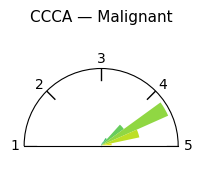

In [7]:
nbins, theta_lim, xtick_lim, cmap = 15, [0, np.pi], [1, 5], plt.cm.viridis
bins = np.linspace(*theta_lim, nbins + 1)
locs = (bins[:-1] + bins[1:]) / 2
widths = np.diff(bins)
norm = Normalize(*theta_lim)
colors = [cmap(norm(l)) for l in locs]
xtick_diff = xtick_lim[1] - xtick_lim[0]
xticks = np.linspace(*theta_lim, xtick_diff + 1)
xticklabels = (xtick_lim[0] + (xtick_diff * xticks) / np.pi).astype(int)

fig, ax = plt.subplots(1, 1, figsize = (2, 2), subplot_kw = {'projection' : 'polar'})
counts, _ = np.histogram(adata_malignant.obs.theta, bins = bins)
bars = ax.bar(locs, counts, width = widths, bottom = 0)

for b, c in zip(bars, colors):
    b.set_facecolor(c)

ax.set_theta_zero_location('W')
ax.set_theta_direction(-1)
ax.set_thetamin(0)
ax.set_thetamax(180)
ax.set_yticks([])
ax.set_xticks(xticks, xticklabels, fontsize = 10)
ax.tick_params('x', pad = -3.5)
ax.set_title('CCCA — Malignant', size = 11)
ax.grid(False)

ylim1 = ax.get_ylim()[1]
ytick_loc = [.85 * ylim1, ylim1]
for theta in xticks:
    ax.plot([theta] * 2, ytick_loc, c = 'k', lw = 1)
ax.set_ylim(top = ylim1)

plt.show()

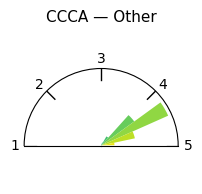

In [8]:
fig, ax = plt.subplots(1, 1, figsize = (2, 2), subplot_kw = {'projection' : 'polar'})
counts, _ = np.histogram(adata_other.obs.theta, bins = bins)
bars = ax.bar(locs, counts, width = widths, bottom = 0)

for b, c in zip(bars, colors):
    b.set_facecolor(c)

ax.set_theta_zero_location('W')
ax.set_theta_direction(-1)
ax.set_thetamin(0)
ax.set_thetamax(180)
ax.set_yticks([])
ax.set_xticks(xticks, xticklabels, fontsize = 10)
ax.tick_params('x', pad = -3.5)
ax.set_title('CCCA — Other', size = 11)
ax.grid(False)

ylim1 = ax.get_ylim()[1]
ytick_loc = [.85 * ylim1, ylim1]
for theta in xticks:
    ax.plot([theta] * 2, ytick_loc, c = 'k', lw = 1)
ax.set_ylim(top = ylim1)

plt.show()

In [ ]:
# ncol, nbins, theta_lim, xtick_lim, cmap = 5, 15, [0, np.pi], [1, 5], plt.cm.viridis
# theta_df = adata.obs.groupby('Disease').theta.mean().sort_values()
# nrow = theta_df.size // ncol + 1
# bins = np.linspace(*theta_lim, nbins + 1)
# locs = (bins[:-1] + bins[1:]) / 2
# widths = np.diff(bins)
# norm = Normalize(*theta_lim)
# colors = [cmap(norm(l)) for l in locs]
# xtick_diff = xtick_lim[1] - xtick_lim[0]
# xticks = np.linspace(*theta_lim, xtick_diff + 1)
# xticklabels = (xtick_lim[0] + (xtick_diff * xticks) / np.pi).astype(int)

# fig, ax = plt.subplots(nrow, ncol, figsize = (12, 12), subplot_kw = {'projection' : 'polar'})
# for i in range(nrow * ncol):
#     row_i, col_i = i // ncol, i % ncol
#     ax_i = ax[row_i, col_i]

#     if i < theta_df.size:
#         disease_i = theta_df.index[i]
#         msk_i = adata.obs.Disease.isin([disease_i])
#         theta_i = adata[msk_i].obs.theta.values
#         counts_i, _ = np.histogram(theta_i, bins = bins)
#         bars_i = ax_i.bar(locs, counts_i, width = widths, bottom = 0)

#         for b, c in zip(bars_i, colors):
#             b.set_facecolor(c)
        
#         ax_i.set_theta_zero_location('W')
#         ax_i.set_theta_direction(-1)
#         ax_i.set_thetamin(0)
#         ax_i.set_thetamax(180)
#         ax_i.set_yticks([])
#         ax_i.set_xticks(xticks, xticklabels, fontsize = 8)
#         ax_i.tick_params('x', pad = -3.5)
#         title_i = '\n'.join(textwrap.wrap(disease_i, width = 25))
#         ax_i.set_title(title_i, y = .95, size = 8.5, va = 'center')
#         ax_i.grid(False)

#         ylim1 = ax_i.get_ylim()[1]
#         ytick_loc = [.85 * ylim1, ylim1]
#         for theta in xticks:
#             ax_i.plot([theta] * 2, ytick_loc, c = 'k', lw = 1)
#         ax_i.set_ylim(top = ylim1)

#     else:
#         ax_i.set_visible(False)

# fig.subplots_adjust(wspace = 0, hspace = .1)
# plt.show()